# Dados da Educação
 De Inicio vamos importar algumas bibliotecas essenciais para nossa análise 
* Pandas
* Matplotlib
* Seaborn
* Numpy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* Os dados podem ser lidos a partir do https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv

* Dados completos em http://inep.gov.br/microdados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [ ]:
df.tail()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montalvânia,31.0,MG,2,0,2,1.0,0,31062961.0,3142700.0,Montalvânia,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CEDCCBDBBCBEABACEBABCAEBCDBBDCCACBBBEEEDDBDCB,99999CBDAEABCEBACACECBDBEDABECBDECACCEBEDAACEA...,CBBCABEACDDDCDEEADCBEDEBECEEBCADAABCBDCDABAAD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,140.0,160.0,140.0,740.0,D,F,A,D,3,G,A,C,C,A,A,B,B,A,A,A,A,A,B,A,A,D,A,B,B
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,1,2902807.0,Barra da Estiva,29.0,BA,2,0,2,1.0,0,29213592.0,2902807.0,Barra da Estiva,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CDABCDBADECCADDEDBBCBEBACCDDACEABDBCABECDDBBC,BCBAE99999BBCBDEEECAEDCEABECDEBBACBEAACCACADDB...,CADEBBCBABEDCCECEDBADCEEBABCBCBDEBCDAAEADBCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,80.0,520.0,E,C,A,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,1,2927408.0,Salvador,29.0,BA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABDBEBBEBCAECEDBEDBDEDBDAAEEEBEDCDABCCCDBCCAE,99999CDCAAAEBBECACBCEACBDCAAEBDEEBDACDDDCBDCCA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,120.0,100.0,80.0,60.0,440.0,H,E,F,B,1,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,B
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,1,2927408.0,Salvador,29.0,BA,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AEEECEDBBCCDDEEAABBCCDDEEABCDEAABBCCDD*AACCDE,99999AEACDABCCACCAEEDDDCDDADDAEAADCECABEBAEAEA...,AEBCAECDADEADDAECACACCECAECEEDACDBBDDAABBCCDE,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,120.0,160.0,620.0,E,E,C,B,2,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
127379,190006120170,2019,3106200,Belo Horizonte,31,MG,19,M,1,2,1,3106200.0,Belo Horizonte,31.0,MG,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DCABECACDDBDBEBACEAECADBEDDBEBCBC*EDABBDACABE,AEBDB99999BBEDBEAACEBADABCAADECAABBADBBBBACBAA...,EDBECCBCBCABABEBBDBCAAABCCBEBABDBACABCBAEEBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,80.0,80.0,80.0,480.0,E,E,B,F,4,C,A,B,C,B,A,B,B,B,B,A,A,A,B,A,A,B,B,A,B


In [ ]:
df.shape

(127380, 136)

In [ ]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Sobre o dataframe do ENEM 2019, temos algumas informações gerais sobre os inscritos: 
* Notas
  * NU_NOTA_CN - Notas Ciencias da Natureza
  * NU_NOTA_CH - Notas Ciencias Humanas
  * NU_NOTA_LC - Notas Linguagens e codigos
  * NU_NOTA_MT - Notas Matematica
  * NU_NOTA_REDACAO - Notas Redacao
* Questoes a se obervar
  * IN_TRAINEIRO
  * As Questoes de Q001 a Q025
  * NU_IDADE
  * TP_SEXO
  * SG_UF_RESIDENCIA

In [ ]:
len(df['SG_UF_RESIDENCIA'].unique()) # Todos os estados presentes

27

Vamos verificar a relacao de idade do conjunto de dados

In [ ]:
df['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Curiosidades, existem pessoas muitos novas, e tambem idosos fazendo enem

1 - Desafio: Proporcao de inscritos por idades.

Text(0.5, 0, 'Idade participantes')

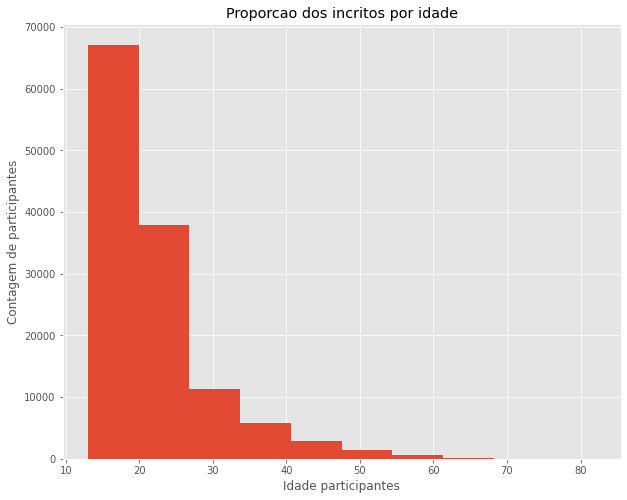

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Proporcao dos incritos por idade')
df['NU_IDADE'].hist()
plt.ylabel('Contagem de participantes')
plt.xlabel('Idade participantes')

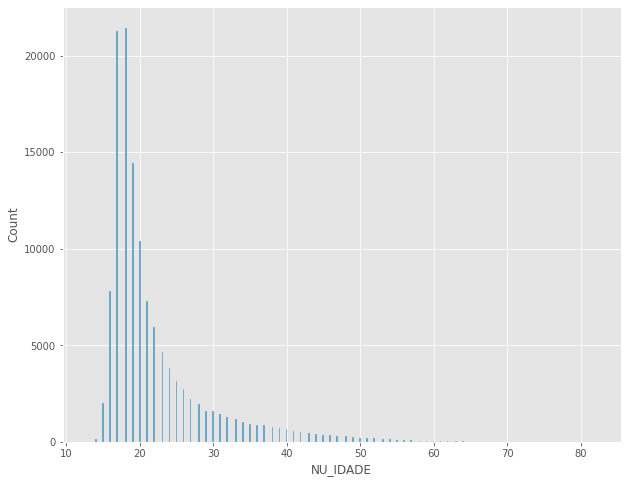

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='NU_IDADE', data=df, palette='hsl')

2 - Desafio: Descobrir de quais estados sao os incritos com 13 anos.

In [ ]:
df.loc[df['NU_IDADE'] == 13]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CAEBCEBECAABCDBEEAEDDBCBACBCECAABDCACEABAEADC,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCCCCDCEAAABCEEEDAD*CCCDEBADCDBBBCBEBDBDBECC,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B


In [ ]:
df.query('NU_IDADE == 13')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CAEBCEBECAABCDBEEAEDDBCBACBCECAABDCACEABAEADC,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCCCCDCEAAABCEEEDAD*CCCDEBADCDBBBCBEBDBDBECC,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B


As pessoas com 13 anos que fizeram enem foram do estado de SP, MT, AP, BA. Porem eles foram treineiros ou estavam realmente fazendo a prova

In [ ]:
df.query('IN_TREINEIRO == 1 and NU_IDADE == 13')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025


Podemos concluir que todos de 13 anos foram realmente para fazer a prova, mas quantos abaixo ou igual a 16 era e nao eram treineiros

In [ ]:
x = df.query('IN_TREINEIRO == 1 and NU_IDADE <= 16')['NU_IDADE'].value_counts().sort_index()
x

14      64
15    1927
16    7142
Name: NU_IDADE, dtype: int64

Vamos verificar todos os treineiros

In [ ]:
df.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Isso mostra que o enem e bem diverso e disperso, pessoas acima de 50 anos fazendo como treineiros, porem a quantidade se concetra nos 16 anos abaixo

3 - Desafio: Adicionar Titulo ao grafico

4 - Plotar os histogramas das idades dos traineiros e nao traineiros

Text(0, 0.5, 'Contagem')

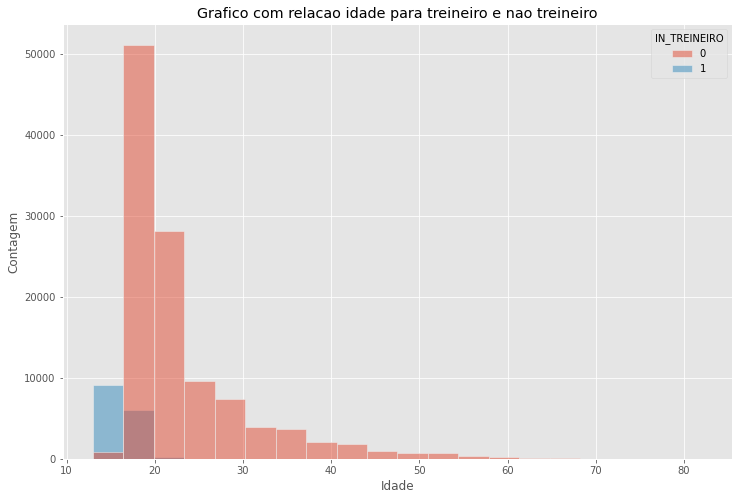

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Grafico com relacao idade para treineiro e nao treineiro')
sns.histplot(x='NU_IDADE', data=df, hue='IN_TREINEIRO', bins=20)
plt.xlabel('Idade')
plt.ylabel('Contagem')

5 - Desafio: Comparar as distribuicoes em ingles e espanhol

6 - Desafio: Explorar mais os dados, documentacao e visualizacao
  * Matplotlib
    * https://matplotlib.org/
  * Seaborn
    * https://seaborn.pydata.org/
  * Plotly
    * https://plotly.com/

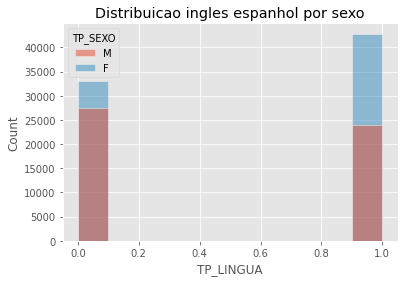

In [ ]:
plt.title('Distribuicao ingles espanhol por sexo')
sns.histplot(x='TP_LINGUA', data=df, hue='TP_SEXO', bins=10)

Podemos analisar nesse desafio, que o numero por escolha do espanhol e maior que o do ingles, sendo espanhol 1, e ingles classificado como 0, e o ingles e muito mais escolhido pelos homens


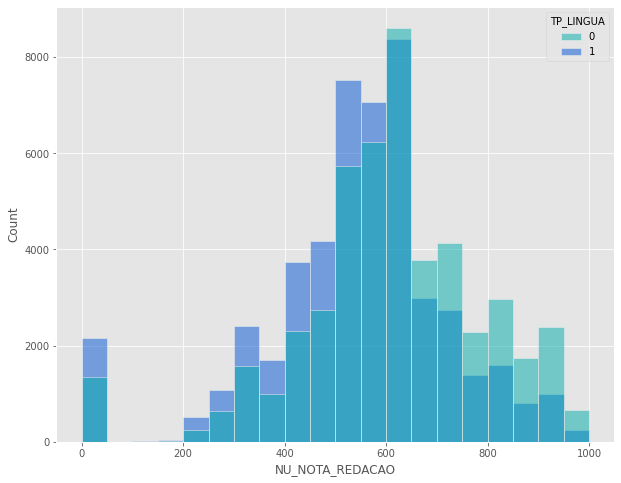

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='NU_NOTA_REDACAO', hue='TP_LINGUA', data=df, palette='winter_r', bins=20)

O espanhol tende a ser mais escolhido pela moda 600 da nota redacao

Relacao nota da redacao

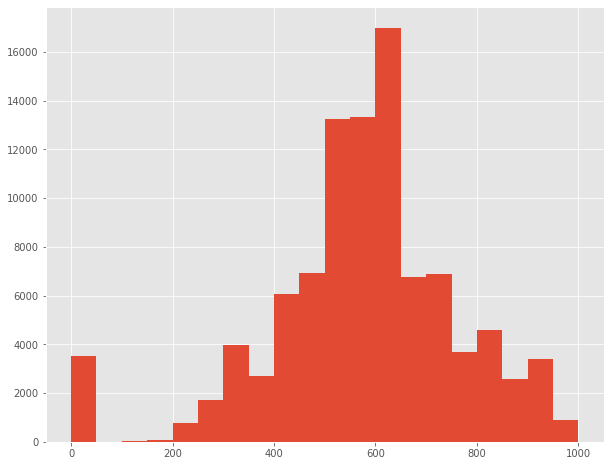

In [ ]:
df['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10, 8))

A relacao da nota da redacao segue uma curva aproximadamente normal, com centro perto dos 600 pontos de moda

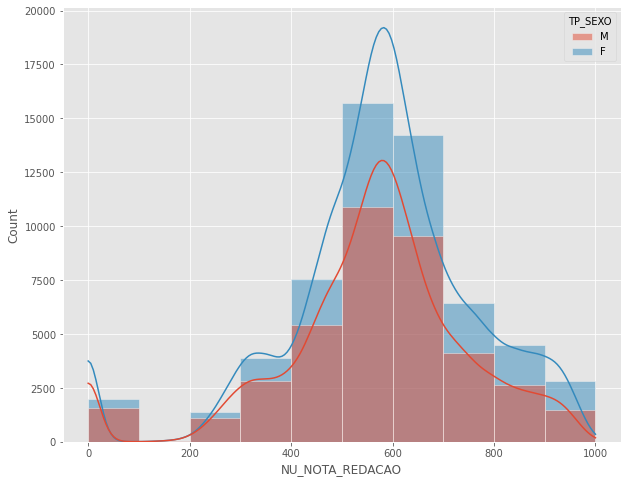

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='NU_NOTA_REDACAO', data=df, kde=True, hue='TP_SEXO', bins=10)

Podemos concluir que a relacao de homens tirando nota 0 e muito maior que a das mulheres, porem os homens estao mais fieis a moda de 600 pontos. Vamos verificar a quantidade de participantes homens e mulheres

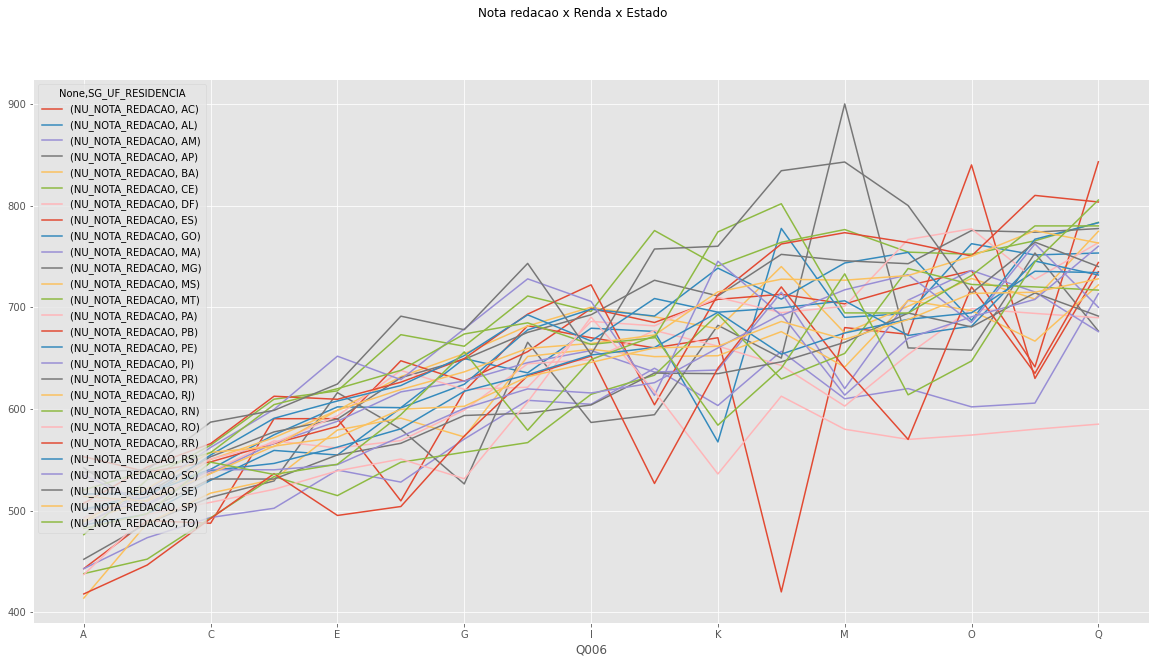

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.suptitle('Nota redacao x Renda x Estado')
df.filter(items=['SG_UF_RESIDENCIA', 'Q006', 'NU_NOTA_REDACAO'])\
                .groupby(['Q006', 'SG_UF_RESIDENCIA'])\
                .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                .unstack().plot(ax=ax)

Podemos concluir que quanto maior a renda familiar, maior a nota da redacao apresentada pelo participante


In [ ]:
 df['TP_SEXO'].value_counts().sort_index()

F    75883
M    51497
Name: TP_SEXO, dtype: int64

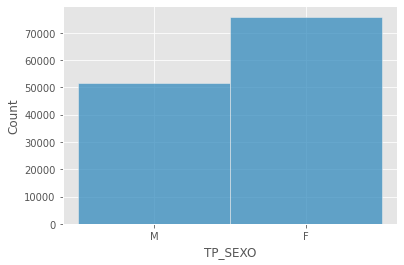

In [ ]:
sns.histplot(x='TP_SEXO', data=df)

A quantidade de participantes mulheres gira em torno de quase 60%, 75883 / 127380 = 0.5957214633380437

Vamos verificar a relacao sexo com a media da notas de redacao

In [ ]:
df['NU_NOTA_REDACAO'].mean()

571.5700253970197

Vamos criar uma variaveis com items somente das notas

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_MT',  'NU_NOTA_LC', 'NU_NOTA_REDACAO']

O describe faz uma pequena analise estatistica, com dados como media, minimo, maximo, quartis e etc

In [ ]:
df[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [ ]:
df[provas].quantile(0.75)

NU_NOTA_CN         533.3
NU_NOTA_CH         567.1
NU_NOTA_MT         598.2
NU_NOTA_LC         565.1
NU_NOTA_REDACAO    680.0
Name: 0.75, dtype: float64

### Conclusões

Como já sabemos o enem é feito por pessoas que estão ou já concluíram o ensino médio, e isso os nossos dados mostram pela grande concentração de pessoas entre idades de 16 a 25 anos. O enem por ser bem diverso nos informa muitas curiosidades, como nos nossos dados que foram encontrados 4 pessoas com idade de 13 anos realizando a prova, essas pessoas são dos respectivos estados SP, MT, MG, BA, e o mais **impressionante** é que essas pessoas não são treineiros, isso concluir que em algumas regiões em específicas tem pessoas com baixa idade entre 13 e 15 anos concluindo o ensino médio. Os treineiros, que são alunos que estão fazendo para adquirir experiência são em maior quantidade aos 16 anos, quando estão em média no segundo ano, outra estatística que os dados nos apontam, e que a lingua espanhol e mais selecionada que o inglês pelos alunos. As notas, principalmente de redação,tem uma moda perto dos 600 pontos, e a renda influencia muito na nota das redações por estado, quanto maior a renda, maiores recursos e notas em todas as matérias, isso é um grande reflexo da educação e da desigualdade brasileira no ensino, e como a base educacional e desigual e fraca. A média das notas da redação gira em torno de 571 pontos, isso reflete muito a falta de preparação das escolas para ajudar os alunos a realizarem a prova, as escolas poderiam oferecer capacitação para os alunos em horário de nao aula, ajudando a elevar a nota, e ajudando principalmente os de menores rendas. E o enem é feito em sua maioria por mulheres. 

## Análise Exploratória

Criar a coluna NU_NOTA_TOTAL para podermos verificar como e a relacao da soma das notas das provas

In [ ]:
df['NU_NOTA_TOTAL'] = df[provas].sum(axis=1)

Somente 25% tiram acima de 680 pontos na redacao, e somente 25% tiram acima de 598.2 em matematica, um reflexo de onde a educacao e falha

7 - Desafio - Fazer uma funcao para o boxplot

In [ ]:
def boxplot (x, y, data, hue=None, order=None):
  plt.figure(figsize=(10, 8))
  sns.boxplot(x=x, y=y, data=data, hue=hue, order=order, palette='hls')

In [ ]:
renda_ordenada = df['Q006'].unique()
renda_ordenada.sort()

boxplot com a nota de matematica em relacao a renda

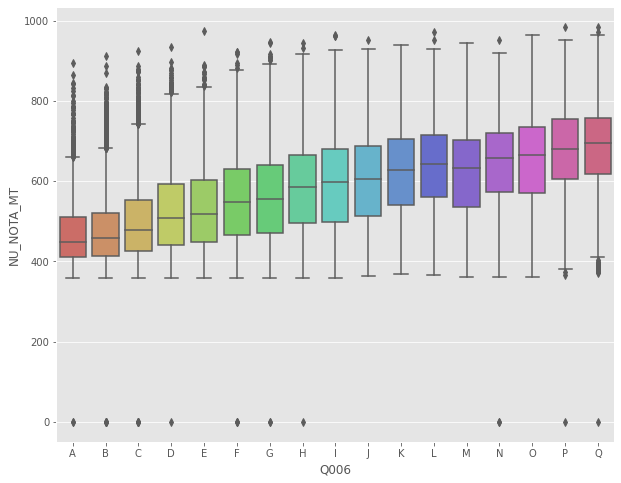

In [ ]:
boxplot('Q006', 'NU_NOTA_MT', df, None, renda_ordenada)

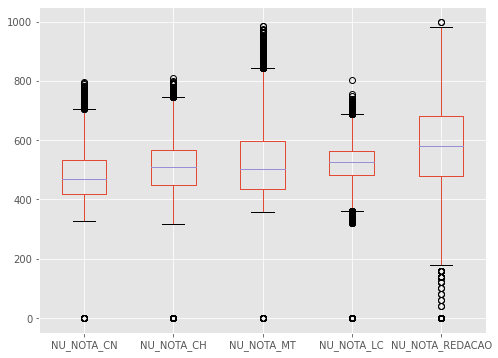

In [ ]:
df[provas].boxplot(grid=True, figsize=(8, 6))

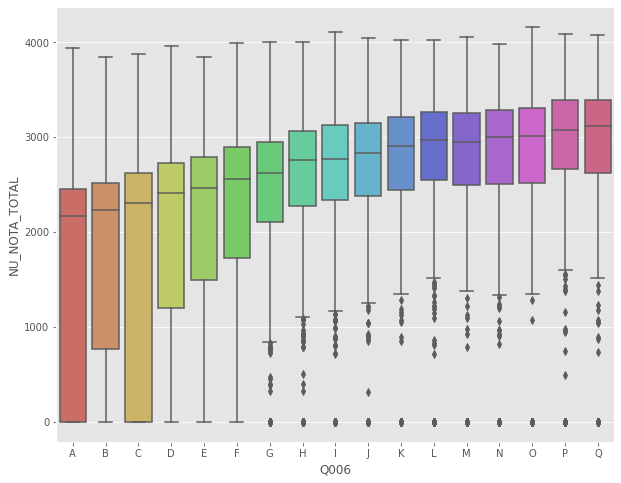

In [ ]:
boxplot('Q006', 'NU_NOTA_TOTAL', df, None, renda_ordenada)

Pessoas com maior renda a soma das notas abrangem valores de menor diferenca e com valor maior, concluido que a renda influencia nas notas

Verificar as notas totais iguais a 0, isso quer dizer que a pessoa nao compareceu nenhum dia para efetuar a prova

In [ ]:
provas.append('NU_NOTA_TOTAL')
df[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


8 - Desafio: Verificar se quem zerou a prova foi eliminado ou nao estava presente

In [ ]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_TOTAL']

In [ ]:
df[presenca].query('NU_NOTA_TOTAL == 0')

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_TOTAL
10,0,0,0,0,0.0
11,0,0,0,0,0.0
26,0,0,0,0,0.0
38,0,0,0,0,0.0
40,0,0,0,0,0.0
...,...,...,...,...,...
127351,0,0,0,0,0.0
127365,0,0,0,0,0.0
127366,0,0,0,0,0.0
127368,0,0,0,0,0.0


In [ ]:
df[presenca].query('TP_PRESENCA_CN != 0 and NU_NOTA_TOTAL == 0')

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_TOTAL
8693,1,1,1,1,0.0
61914,1,0,0,1,0.0
70163,1,0,0,1,0.0
101269,1,1,1,1,0.0
109408,1,0,0,1,0.0


Existem pessoas que estavam presente todos os dias e totalizaram 0 na nota, ou seja, provavelmente foi eliminado da prova

9 - Desafio: Quem e elimando da prova tira 0 ou NaN (Nao teve registro de notas)
 * Resposta: Quem e eliminado da prova tira 0
 
10 - Desafio: Verificar a proporcao de rendas mais altas e mais baixas como treineiro e nao treineiro.

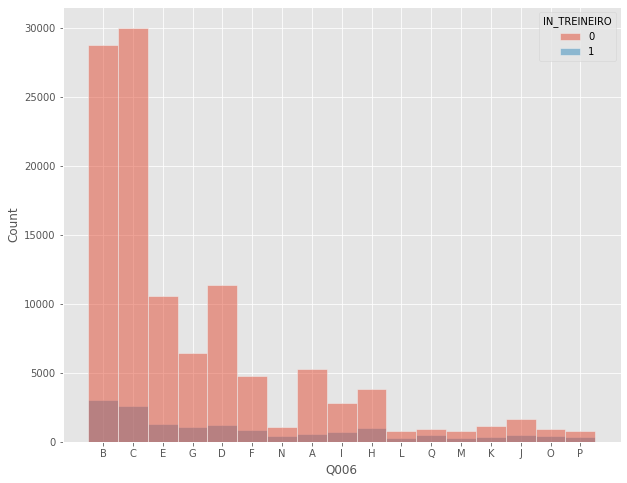

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Q006', hue='IN_TREINEIRO', data=df)

Text(0, 0.5, 'Nota total')

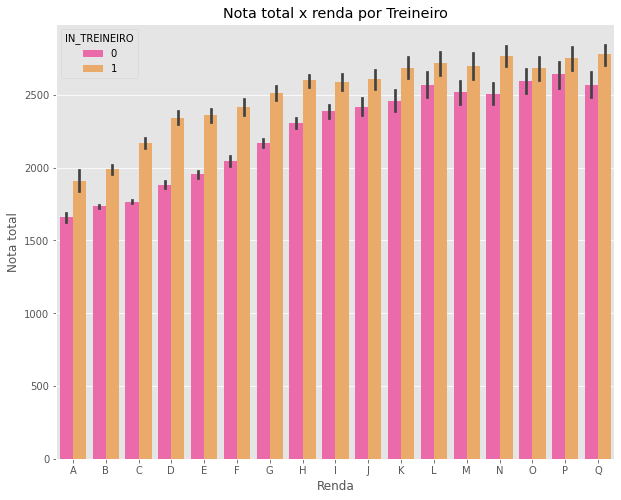

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Nota total x renda por Treineiro')
sns.barplot(x='Q006', y='NU_NOTA_TOTAL', hue='IN_TREINEIRO', data=df, palette='spring', order=renda_ordenada)
plt.xlabel('Renda')
plt.ylabel('Nota total')

De acordo com o aumento da renda, os treineiros e os nao treineiros tambem aumentam suas notas totais, os treineiros tem melhor desempenho em todas as classes de rendas

11 - Desafio: fazer o mesmo boxplot olhando para a questao 25 (tem internet ou nao) e fazer uma reflexao sobre o assunto e o contexto de pandemia.

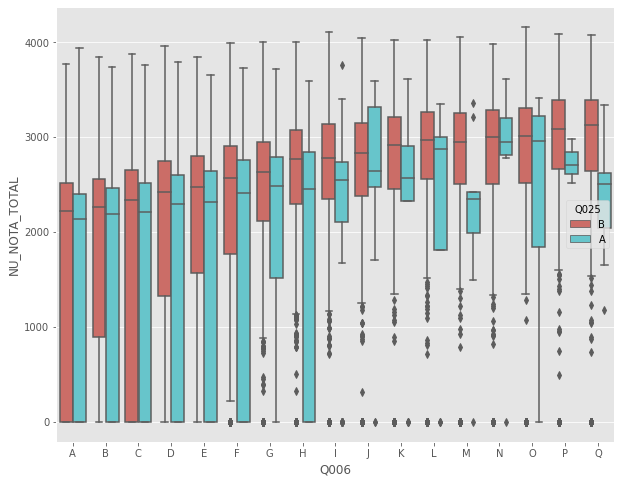

In [ ]:
boxplot('Q006', 'NU_NOTA_TOTAL', df, 'Q025', renda_ordenada)

Podemos concluir que nas rendas mais altas, a diferenca das notas para (B) tem internet quanto a (A) nao tem internet e gritante

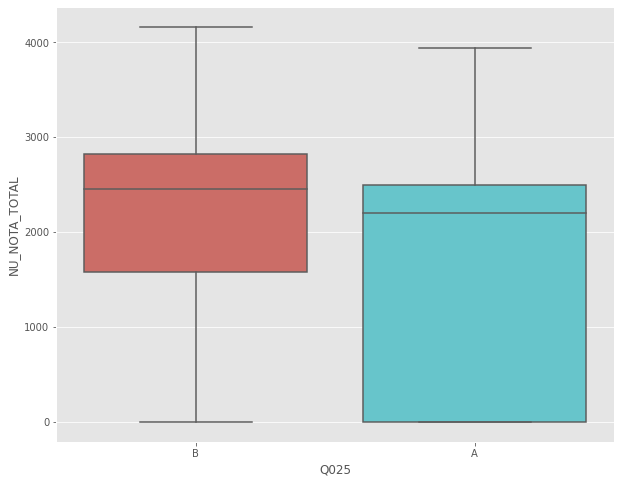

In [ ]:
boxplot('Q025', 'NU_NOTA_TOTAL', df, None, None)

Pessoas com internet (B) mantem uma nota mais alta entre 1500 a 3000, e com menores chances de notas abaixo de 1000, ou seja, ter internet em casa influencia na relacao das notas

Agora vamos trabalhar com dados sem notas 0, para trabalharmos ao maximo sem vies nenhum

In [ ]:
dados_sem_notas_zero = df.query('NU_NOTA_TOTAL != 0')
dados_sem_notas_zero.tail()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montalvânia,31.0,MG,2,0,2,1.0,0,31062961.0,3142700.0,Montalvânia,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBDAEABCEBACACECBDBEDABECBDECACCEBEDAACEA...,CBBCABEACDDDCDEEADCBEDEBECEEBCADAABCBDCDABAAD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,140.0,160.0,140.0,740.0,D,F,A,D,3,G,A,C,C,A,A,B,B,A,A,A,A,A,B,A,A,D,A,B,B,2867.4
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,1,2902807.0,Barra da Estiva,29.0,BA,2,0,2,1.0,0,29213592.0,2902807.0,Barra da Estiva,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BCBAE99999BBCBDEEECAEDCEABECDEBBACBEAACCACADDB...,CADEBBCBABEDCCECEDBADCEEBABCBCBDEBCDAAEADBCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,80.0,520.0,E,C,A,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B,2218.5
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,1,2927408.0,Salvador,29.0,BA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CDCAAAEBBECACBCEACBDCAAEBDEEBDACDDDCBDCCA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,120.0,100.0,80.0,60.0,440.0,H,E,F,B,1,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,B,1453.9
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,1,2927408.0,Salvador,29.0,BA,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999AEACDABCCACCAEEDDDCDDADDAEAADCECABEBAEAEA...,AEBCAECDADEADDAECACACCECAECEEDACDBBDDAABBCCDE,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,120.0,160.0,620.0,E,E,C,B,2,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,2573.9
127379,190006120170,2019,3106200,Belo Horizonte,31,MG,19,M,1,2,1,3106200.0,Belo Horizonte,31.0,MG,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AEBDB99999BBEDBEAACEBADABCAADECAABBADBBBBACBAA...,EDBECCBCBCABABEBBDBCAAABCCBEBABDBACABCBAEEBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,80.0,80.0,80.0,480.0,E,E,B,F,4,C,A,B,C,B,A,B,B,B,B,A,A,A,B,A,A,B,B,A,B,2287.8


boxplot com os dados sem notas zero, porem a renda ainda influencia na nota total, podemos ver pela pequena escadinha formada com os boxplots

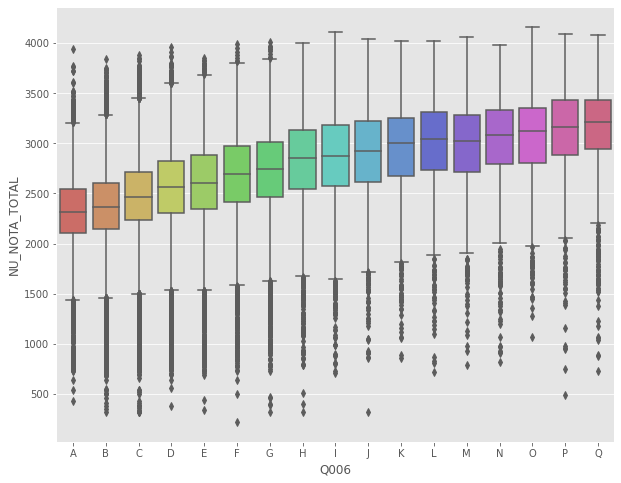

In [ ]:
boxplot('Q006', 'NU_NOTA_TOTAL', dados_sem_notas_zero, None, renda_ordenada)

### Conclusões
Na análise exploratória os dados já dizem por si, a renda e as questões como acesso a internet influenciam em praticamente todas as notas, e a renda é proporcional a nota. Com essa análise o governo deveria focar seus investimentos na base, e na pré infância, que e onde define muito do ensino médio, pois muitos alunos chegam com deficiência em matéria de ensino fundamental, e acabam carregando essa deficiência muitas vezes até para a faculdade.

## Distribuições e Correlações entre notas

Histograma com a relacao de sexo com a nota total

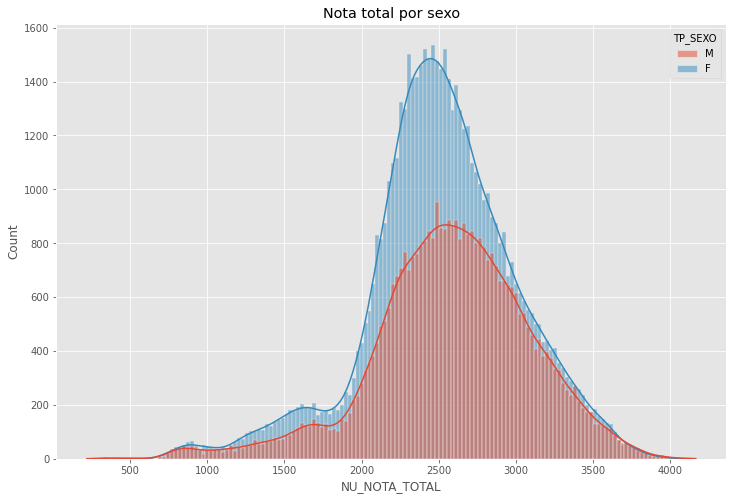

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Nota total por sexo')
sns.histplot(data=dados_sem_notas_zero, x='NU_NOTA_TOTAL', kde=True, hue='TP_SEXO')

Como ja foi concluido, existem mais mulheres que homens fazendo a prova

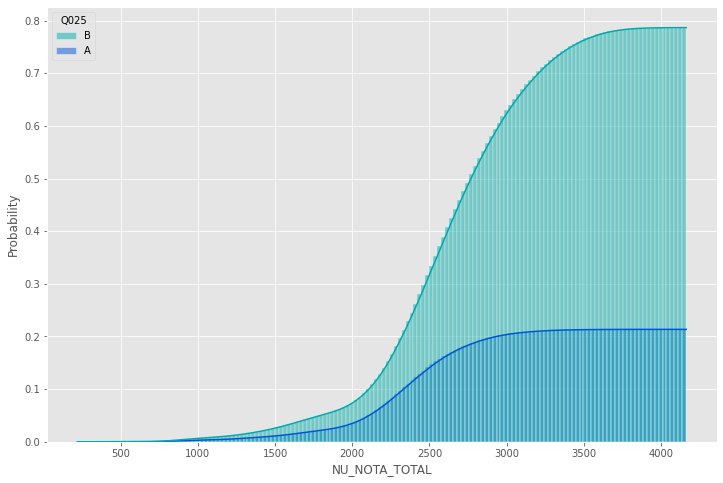

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=dados_sem_notas_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=True, stat='probability', cumulative=True, palette='winter_r')

Analise da nota total em relacao a tem ou nao internet em casa, usando probabilidade, para normalizar entre 0 e 1

Pairplot para verificar o quanto as variaves das notas das provas estao correlacionadas uma as outras

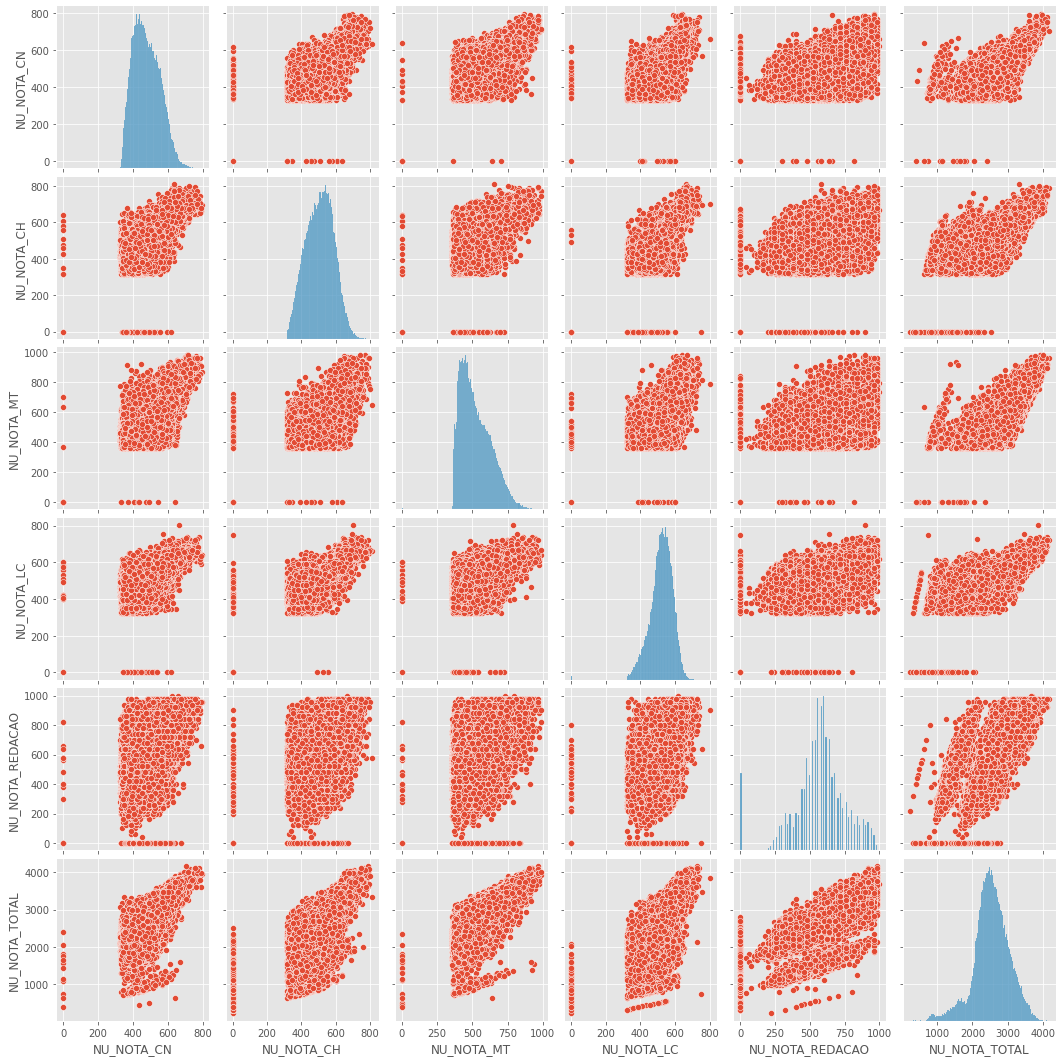

In [ ]:
#pairplot 
sns.pairplot(data=dados_sem_notas_zero[provas])

Verificando a correlacao das variaveis com o .corr()

In [ ]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


Podemos verificar que nao tem uma correlacao tao ardua, porem linguagens e codigos tem boa relacao com ciencias humanas, possuem uma correlacao de 0.744170	

Agora vamos fazer um mapa de correlacao entre as variaveis

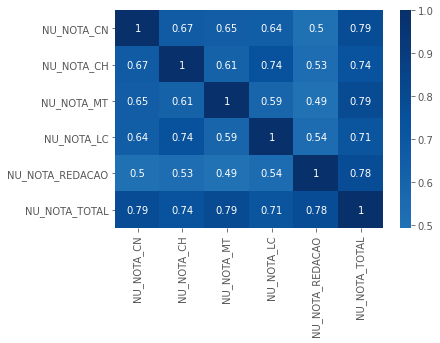

In [ ]:
# heatmap de correlacao
sns.heatmap(data=correlacao, cmap='Blues', center=0, annot=True)

8 - Desafio: criar a matriz diagonal de correlacao e analisar mais detalhes

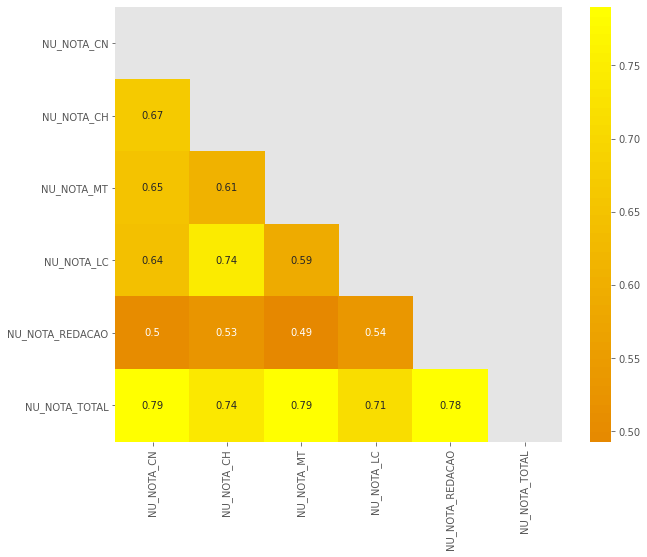

In [ ]:
#heatmap de correlacao
plt.figure(figsize=(10, 8))
mask = np.triu(correlacao)
sns.heatmap(data=correlacao, cmap='gnuplot', center=0, annot=True, mask=mask)

10 - Desafio: Pensar sobre a correlacao entre matematica e linguagens
* Apresenta uma correlacao de 59%, algo relativamente mediano, onde estao duas provas com conteudos bem diferentes, exatas, e outra de "humanas", que abrange Língua Portuguesa, Literatura e Língua Estrangeira (Inglês ou Espanhol)
* A maior correlacao e entre matematica e ciencias humanas, e a pior e entre redacao e matematica
* Podemos ter um indicativo que os alunos que vao bem em matematica, se preparam menos para materias de ciencias e humanas, e principalmente tem maiores dificuldades na redacao

### Conclusões

Nas correlações, as notas apresentam correlações entre si não muito significativas, sendo essa correlação maior somente em linguagens e códigos que tem boa relação com ciências humanas, uma correlação de 74%, porém redação e o que apresenta menor correlação com todas as notas, com todas próximas de 50%. 

## Aqui comeca a Analise do meu estado MG
##### 9 - Desafio: Filtrar as notas por seu estado ou sua cidade e refazer as analises, verificando se sao semelhantes no geral

In [ ]:
df_MG = df.loc[df['SG_UF_RESIDENCIA'] == 'MG']

In [ ]:
df_MG.tail()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
127329,190006117457,2019,3138682,Luislândia,31,MG,17,F,1,1,1,3108602.0,Brasília de Minas,31.0,MG,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BDCCACECBAECCADCBCCABABBEBDEBDAADAEECDBEA...,CBDBCAEBEEEBDCBCADCCBDDBCEBEDDDADEDBEBEADCCEA,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,100.0,120.0,580.0,E,G,D,E,4,G,A,B,D,B,B,B,B,A,A,A,A,A,B,B,A,C,A,B,B,2825.9
127355,190006118808,2019,3131307,Ipatinga,31,MG,17,F,1,3,1,3139409.0,Manhuaçu,31.0,MG,2,0,2,1.0,0,31191132.0,3131307.0,Ipatinga,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBCD99999BACDCDEDEBDAADCBEBDEBBAABDEECCAECACC...,DEEBAECBADAACEAEAEECBDCCEDCDCBABAACAEEBEAAACB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,200.0,200.0,200.0,200.0,960.0,B,D,B,B,4,E,A,C,D,B,A,B,B,B,A,B,A,A,C,A,A,D,A,B,B,3452.0
127356,190006118824,2019,3145208,Nova Serrana,31,MG,18,M,1,1,1,3107406.0,Bom Despacho,31.0,MG,2,0,2,1.0,0,31034665.0,3145208.0,Nova Serrana,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BBADA99999CEAABBCABCBACBCEADEEDCEBAEADABEDBDCD...,EBEECBAEDDBBBECBCDEDCCAEACBECCACDABBDBACBECB*,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,120.0,160.0,100.0,640.0,E,E,C,B,7,E,D,C,E,C,A,B,B,B,B,B,A,A,C,B,A,A,A,B,B,2688.2
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montalvânia,31.0,MG,2,0,2,1.0,0,31062961.0,3142700.0,Montalvânia,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBDAEABCEBACACECBDBEDABECBDECACCEBEDAACEA...,CBBCABEACDDDCDEEADCBEDEBECEEBCADAABCBDCDABAAD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,140.0,160.0,140.0,740.0,D,F,A,D,3,G,A,C,C,A,A,B,B,A,A,A,A,A,B,A,A,D,A,B,B,2867.4
127379,190006120170,2019,3106200,Belo Horizonte,31,MG,19,M,1,2,1,3106200.0,Belo Horizonte,31.0,MG,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AEBDB99999BBEDBEAACEBADABCAADECAABBADBBBBACBAA...,EDBECCBCBCABABEBBDBCAAABCCBEBABDBACABCBAEEBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,80.0,80.0,80.0,480.0,E,E,B,F,4,C,A,B,C,B,A,B,B,B,B,A,A,A,B,A,A,B,B,A,B,2287.8


Boxplot de minas em relacao a renda

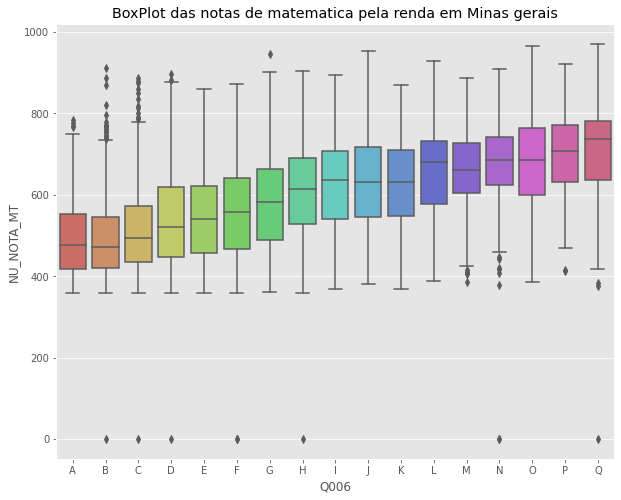

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('BoxPlot das notas de matematica pela renda em Minas gerais')
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=df_MG, order=renda_ordenada, palette='hls')

Novamente podemos analisar que a questao da renda continua presente no estado de minas gerais, rendas mais altas estao correlacionadas a nota de matematica maior

In [ ]:
# Nota total das provas de minas gerais
df_MG['NU_NOTA_TOTAL'] = df[provas].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Criando dados sem notas zero do estado de minas
dados_sem_notas_zero_mg = df_MG.query('NU_NOTA_TOTAL != 0')

Vamos utilizar novamente nossa funcao de boxplot para verificar a relacao da nota de matematica com treineiros ou nao no estado de MG

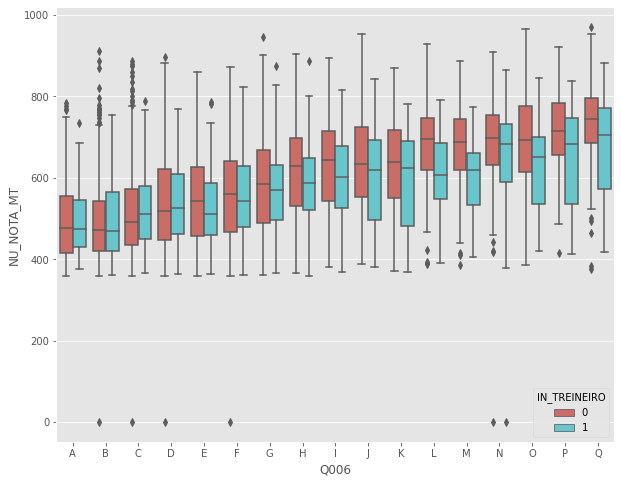

In [ ]:
boxplot('Q006', 'NU_NOTA_MT', dados_sem_notas_zero_mg, 'IN_TREINEIRO', order=renda_ordenada)

Text(0, 0.5, 'Nota total')

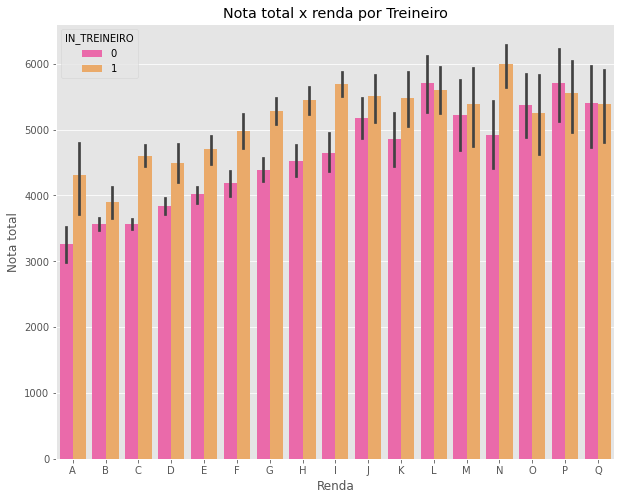

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Nota total x renda por Treineiro')
sns.barplot(x='Q006', y='NU_NOTA_TOTAL', hue='IN_TREINEIRO', data=df_MG, palette='spring', order=renda_ordenada)
plt.xlabel('Renda')
plt.ylabel('Nota total')

Novamente os treineiros conseguem uma nota total melhor que os não treineiros, isso diferente dos dados de todos os estados, só não acontecem nos de renda superior a 19 mil, que se igualam. Assim podemos analisar que possivelmente a questão emocional dos não treineiros pode afetar durante a prova. Seria requisitado treinamento psicológico para os alunos que iriam realizar a prova como não treineiros, isso poderia ter impacto grande na nota final.

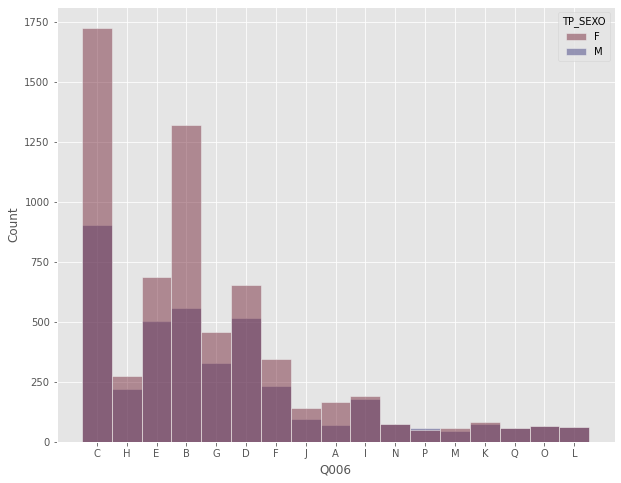

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Q006', hue='TP_SEXO', data=dados_sem_notas_zero_mg, palette='icefire_r', bins=10)

Text(0, 0.5, 'Nota total')

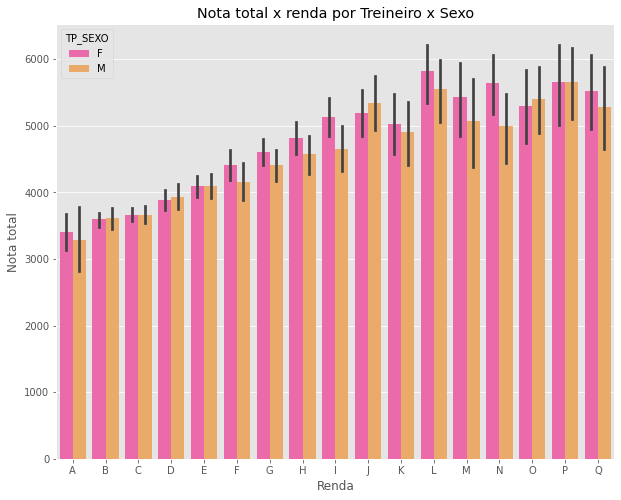

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Nota total x renda por Treineiro x Sexo')
sns.barplot(x='Q006', y='NU_NOTA_TOTAL', hue='TP_SEXO', data=df_MG, palette='spring', order=renda_ordenada)
plt.xlabel('Renda')
plt.ylabel('Nota total')

As pessoas de maiores rendas sao mulheres, mas isso se da tambem pela sua maioria em relacao aos homens

In [ ]:
dados_sem_notas_zero_mg.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
5511,190001220435,2019,3106200,Belo Horizonte,31,MG,18,F,1,3,4,NaN,NaN,NaN,NaN,2,0,2,1.0,0,31001210.0,3106200.0,Belo Horizonte,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BDABE99999DCBAADDBECDAAECDBECCECECCDEADACDBEEB...,DBCBACCDADEBBECECABCBBEDEDBEACADAABDDBCDEADCB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,180.0,160.0,160.0,180.0,820.0,E,F,D,E,2,C,A,C,D,A,A,B,A,B,A,A,A,B,B,A,B,C,A,B,B,6635.6
5598,190001223899,2019,3127107,Frutal,31,MG,18,F,1,1,1,3127107.0,Frutal,31.0,MG,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADBCE99999ABBCBDCAACCCDDEDACDEBCDCDECCDCBBCEDD...,CACDBCDBDDDBBABCDBCEDCDACDDABCCBACBCDEADBAABD,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,140.0,160.0,180.0,740.0,F,F,D,D,5,H,B,C,D,C,A,B,B,B,A,B,A,A,C,B,B,E,B,B,B,5861.2
5600,190001223933,2019,3148004,Patos de Minas,31,MG,38,F,1,3,1,3148004.0,Patos de Minas,31.0,MG,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999EECACBCBCDDEADBADEECECEEEDEBECAEBDADDCDBC...,EDBCADDBAABAACCEEBEBEDABCDCECCDDAAABDCDEBBBED,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,180.0,180.0,160.0,180.0,160.0,860.0,B,B,B,B,3,E,A,B,B,B,B,B,A,B,A,A,A,B,C,A,A,D,B,B,B,5911.6
5601,190001223998,2019,3136009,Joaíma,31,MG,20,F,1,1,2,NaN,NaN,NaN,NaN,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BECABCCDBAEDCACBADBBDACBACAEBDAAEABEAEDCA...,ACBDACACBCADAAEDEAAAADCDAEBDBDBCBBEBCDDDBDABC,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,A,A,4,B,A,B,C,B,A,B,A,B,A,B,A,A,B,B,B,C,A,A,B,4646.6
5691,190001227632,2019,3167202,Sete Lagoas,31,MG,19,F,1,3,1,3125705.0,Felixlândia,31.0,MG,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BDDEE99999DCBEADDBECDABECAEBCEECCCBCCBDAADEBDB...,ACEEDBDCADCEADABAEDECCDDBAEEACCCEAEBCAEDBACAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,160.0,160.0,200.0,880.0,B,D,A,A,4,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B,6241.2


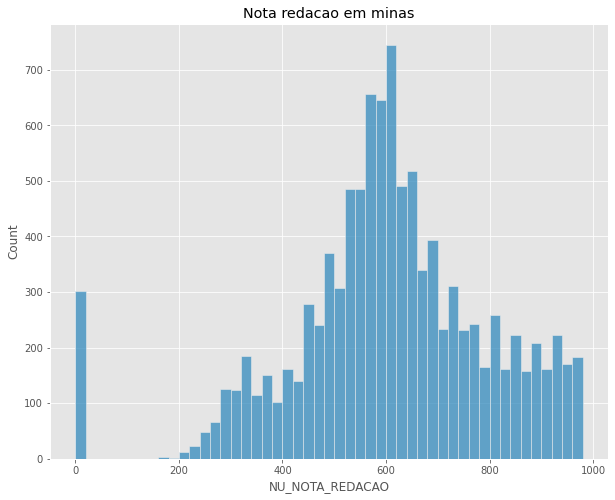

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Nota redacao em minas')
sns.histplot(x='NU_NOTA_REDACAO', data=dados_sem_notas_zero_mg, palette='hls')

Assim como os dados no Brasil, em minas a moda da nota gira em torno de 600 pontos

### Conclusões

As análises dos dados de Minas Gerais são bem fiéis as análises feitas do Brasil inteiro, podendo tirar praticamente as mesmas conclusões, mas algo que podemos tirar de conclusões, talvez para todos os estados, e quanto a renda e os recursos como internet e acesso influenciam na nota

## Machine Learning

In [ ]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Agora vamos dividir nosso dataset, nas colunas de *features* e *target*, nossa intencao aqui e prever a nota de matematica de acordo com as outras notas tirada pelo participante

In [ ]:
# Pegando os indices de todas as notas para poder fazer o drop dos valores nulos
provas_total = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

# Selecao das features de entrada
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# Selecao da target de saida
target = 'NU_NOTA_MT'

Vamos verificar se existem dados nulos nas nossas *features* selecionadas

In [ ]:
# Sim, existem dados nulos, e agora vamos dropar eles
print(dados_sem_notas_zero[features].isnull().sum())

# Dropando os dados nulos
dados_sem_notas_zero = dados_sem_notas_zero[provas_total].dropna()

NU_NOTA_CN         5465
NU_NOTA_CH          216
NU_NOTA_LC          216
NU_NOTA_REDACAO     216
dtype: int64


In [ ]:
dados_sem_notas_zero.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,435.6,512.3,488.6,420.0,432.4
2,423.2,499.1,441.0,560.0,427.2
3,426.2,578.1,551.5,500.0,499.9
4,516.5,571.3,511.2,780.0,424.5
5,559.6,618.7,607.5,900.0,615.6


Agora vamos definir os dados que vao entrar e os de saida

In [ ]:
notas_entrada = dados_sem_notas_zero[features]
notas_saida = dados_sem_notas_zero[target]

In [ ]:
x = notas_entrada
y = notas_saida

Importando o train_test_split para dividir os dados entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(notas_entrada, notas_saida, test_size=0.25, random_state=SEED)

Agora vamos importar e testar alguns modelos, e comparar acuracias

### Vamos testar alguns modelos

Vamos fazer uma funcao para facilitar a verificacao das metricas

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
def metrics(model, X_test, y_test, print_coef=True):

  #não printar com notação científica
  np.set_printoptions(suppress=True)

  # modelo
  print('R2: {:.3f}'.format(model.score(X_test, y_test)))
  print('MSE: {}'.format(mean_squared_error(y_test, model.predict(X_test))))

Agora vamos aplicar uma regressao SVR, derivada dos SVM (vetores de suporte)

In [ ]:
from sklearn.svm import LinearSVR

dtc = LinearSVR(random_state=SEED).fit(X_train, y_train)

metrics(dtc, X_test, y_test)

R2: 0.064
MSE: 11116.806037410239


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#criando as predicoes sobre teste
predict = dtc.predict(X_test)

Vamos plotar a descricao estatistica formada pelos dados de entrada com as predicoes para todos os modelos treinados

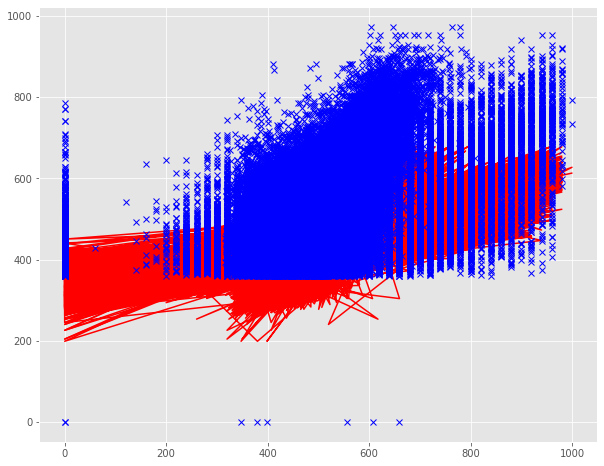

In [ ]:

#Para plotar imagens
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

# Plotando Predições do modelo regressão simples 
plt.plot(X_test, predict, color="red")

#Amotras de teste (azual)
plt.plot(X_test, y_test, 'bx')

plt.show()


Analisando vemos que a regressao nao abrange boa parte dos dados, pois eles estao muito espalhados tambem

A arvore de regressao sao identicas as arvores de decisoes, pois tambem e formada por nos de decisao e perguntas, porem o resultado e escalar e nao categorico

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtc_tree = DecisionTreeRegressor(random_state=SEED).fit(X_train, y_train)

metrics(dtc_tree, X_test, y_test)


R2: 0.048
MSE: 11309.100791009294


In [ ]:
#criando as predicoes sobre teste
predict_tree = dtc_tree.predict(X_test)

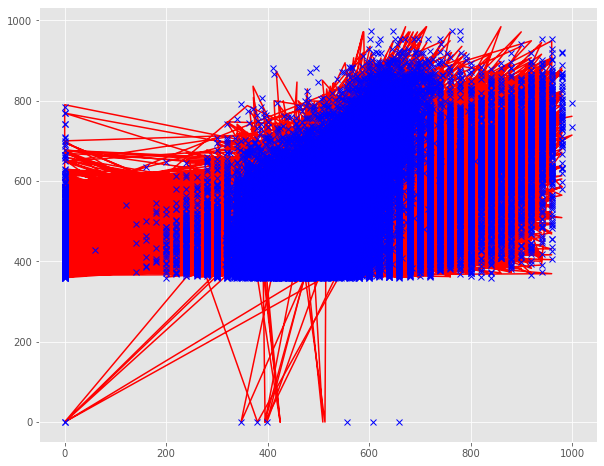

In [ ]:

#Para plotar imagens
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

# Plotando Predições do modelo regressão simples 
plt.plot(X_test, predict_tree, color="red")

#Amotras de teste (azual)
plt.plot(X_test, y_test, 'bx')

plt.show()


O modelo de regressao linear gera uma equação que descreve a relação estatística entre uma ou mais variáveis preditoras e a variável resposta. A regressão linear encontra a linha que melhor representa as variáveis de entrada com as variaveis de saida

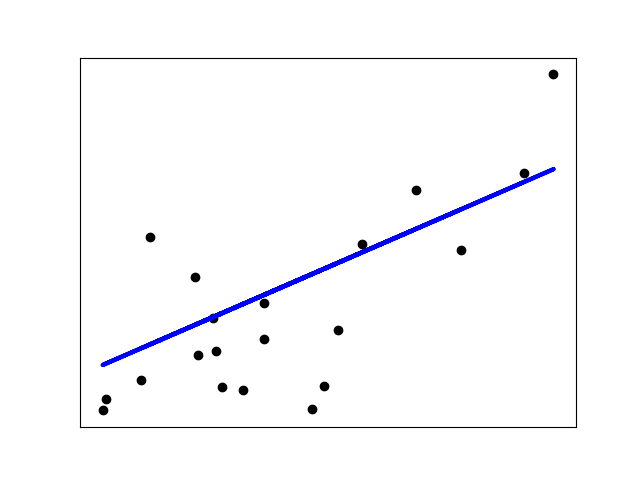

In [ ]:
from sklearn.linear_model import LinearRegression

dtc_linear = LinearRegression().fit(X_train, y_train)

metrics(dtc_linear, X_test, y_test)

R2: 0.500
MSE: 5940.637064460446


In [ ]:
#criando as predicoes sobre teste
predict_linear = dtc_tree.predict(X_test)

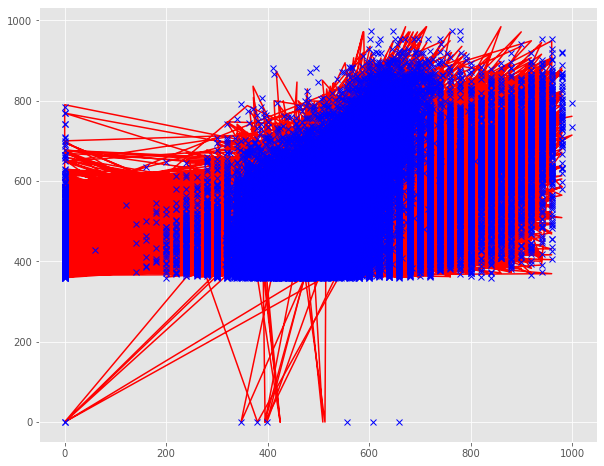

In [ ]:

#Para plotar imagens
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

# Plotando Predições do modelo regressão simples 
plt.plot(X_test, predict_linear, color="red")

#Amotras de teste (azual)
plt.plot(X_test, y_test, 'bx')

plt.show()


### Conclusões
Já no machine learning podemos concluir que os modelos de regressão apresentados não foram os melhores para os nossos dados, pois não conseguiram encontrar boas relações entre as variáveis, e gerando erros altos, e nosso melhor modelo que foi o de árvore, com certa profundidade setada, começa a apresentar resultados piores.

## Validação de modelo

Vamos comecar definindo uma funcao para calcular o intervalo de confianca e o mse

In [ ]:
def calcula_mse (resultados): 
  resultados = cross_validate(dtc_tree, x, y, cv= 10, scoring="neg_mean_squared_error")
  media = (resultados['test_score']*-1).mean()
  desvio_padrao = (resultados['test_score'] * -1).std()
  lim_inferior = media - (2*desvio_padrao)
  lim_superior = media + (2*desvio_padrao)

  print(f'Intervalo de confianca {lim_inferior} - {lim_superior} ')

Para validacao dos nossos modelos, vamos definir um intervalo de confianca medio

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED = 1232
np.random.seed(SEED)


partes = KFold(n_splits = 10, shuffle=True)
resultados = cross_validate(dtc_tree, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confianca 10712.773692637766 - 11872.473753160677 


In [ ]:
def regressor_tree (nivel):
  SEED = 1232
  np.random.seed(SEED)  
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel, )
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring="neg_mean_squared_error", return_train_score=True)
  print(f"Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
  

regressor_tree(4)

Treino = 5760.834451245899 | Teste = 5815.707286597402


Agora vamos verificar o intervalo de confianca para alguns niveis da arvore

In [ ]:
for i in range(1, 21):
  regressor_tree(i)

Treino = 7844.952652412207 | Teste = 7857.871770206351
Treino = 6527.783475408351 | Teste = 6556.886287657656
Treino = 6021.275229419074 | Teste = 6054.767567442071
Treino = 5760.834451245899 | Teste = 5815.707286597402
Treino = 5598.158955426787 | Teste = 5675.196789060743
Treino = 5469.677369145868 | Teste = 5593.304363812442
Treino = 5369.458309852723 | Teste = 5542.730565094406
Treino = 5276.16965707928 | Teste = 5543.4809609730655
Treino = 5166.713159932668 | Teste = 5608.854872163518
Treino = 5022.598049115693 | Teste = 5763.155248722027
Treino = 4833.560706021637 | Teste = 5960.052989742388
Treino = 4598.125022484774 | Teste = 6216.545956232321
Treino = 4316.3791662866815 | Teste = 6519.376217056128
Treino = 4000.6209880837496 | Teste = 6849.577463417832
Treino = 3655.8197526274853 | Teste = 7220.55475782693
Treino = 3295.832684540846 | Teste = 7634.732578617249
Treino = 2931.7212612043877 | Teste = 8068.112294631386
Treino = 2575.59534021339 | Teste = 8449.25417707589
Treino = 

## Desafios

#### Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá)

Um intervalo de confiança e um intervalo estimado de um parâmetro de interesse de uma população. Em vez de estimar por um único valor, estimamos um intervalo provável. Os intervalos de confiança são usados para estimar a confiabilidade de uma estimativa. Como a imagem abaixo ilustra bem o calculo e como é definido, normalmente é definido uma distribuição normal, onde 95% dos valores tem que cair entre o 1-alpha, e alpha/2 que são 2,5% da margem de erro dos 5%, sendo 2,5% pra cima e 2,5% para baixo.

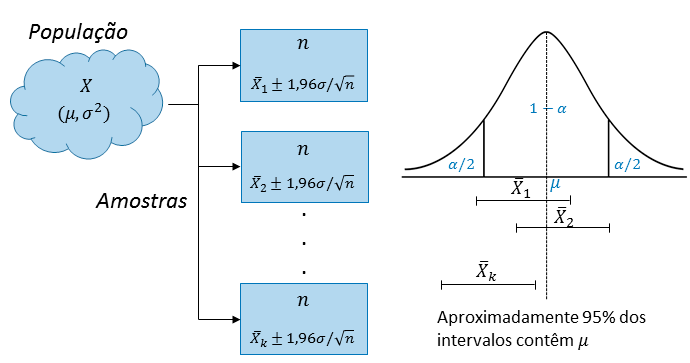

### Desafio 02: Testar com outros parâmetros da árvore de decisão

* Vamos alterar o parametro *splitter* tambem, por padrao vem a escolha *best* dos melhores divisoes, vamos alterar para *random*

In [ ]:
def regressor_tree (nivel):
  SEED = 1232
  np.random.seed(SEED)  
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel, random_state=SEED, splitter='random')
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring="neg_mean_squared_error", return_train_score=True)
  print(f"Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
  

regressor_tree(4)

Treino = 6382.597230231654 | Teste = 6387.153620429982


In [ ]:
for i in range(1, 21):
  regressor_tree(i)

Treino = 9025.154166544091 | Teste = 9026.678918694259
Treino = 7098.958959260798 | Teste = 7097.946142752911
Treino = 6705.900137064224 | Teste = 6708.072457860988
Treino = 6382.597230231654 | Teste = 6387.153620429982
Treino = 6196.158464515129 | Teste = 6204.689597509108
Treino = 5900.660373961194 | Teste = 5921.384251030101
Treino = 5841.143960308683 | Teste = 5868.456539175341
Treino = 5719.999350052777 | Teste = 5785.518565070709
Treino = 5594.279763384575 | Teste = 5729.494711681809
Treino = 5437.704295214888 | Teste = 5664.75119242932
Treino = 5337.90579540864 | Teste = 5712.930572739639
Treino = 5213.876049427593 | Teste = 5731.04781789712
Treino = 5058.349743523555 | Teste = 5851.009229859601
Treino = 4869.501526915119 | Teste = 6010.029758494315
Treino = 4637.395501120986 | Teste = 6211.231185492543
Treino = 4375.076654603996 | Teste = 6514.882464678146
Treino = 4059.4754914797013 | Teste = 6846.130731460286
Treino = 3655.1354978180143 | Teste = 7318.455232078952
Treino = 32

### Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV
from random import randrange
max_depth = []
min_samples_split = []

max_depth = np.array([randrange(0, 9)])
min_samples_split = np.array([randrange(0, 4)])

param_grid = {'max_depth': max_depth, 
        'min_samples_split': min_samples_split}

grid = GridSearchCV(DecisionTreeRegressor(), 
                    param_grid, 
                    scoring='neg_mean_square_error', 
                    cv=10, n_jobs=1, verbose=1)

In [ ]:
  resultados = cross_validate(grid, x, y, cv=partes, scoring="neg_mean_squared_error", return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'neg_mean_square_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

  FitFailedWarning)


In [ ]:
  print(f"Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")

Treino = nan | Teste = nan


### Desafio 04: Pesquisar o que é o problema de underfit.

O caso do *Underfitting* e quando o modelo já é ruim no próprio treinamento, pois ele não consegue se adaptar aos dados fornecidos. O modelo com *Underfitting* não consegue encontrar relações entre as variáveis, esse modelo normalmente já pode ser descartado pois não terá utilidade em produção.

## **Referencias**
[1]. https://didatica.tech/underfitting-e-overfitting/

[2]. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

[3]. https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/

[4]. https://qastack.com.br/datascience/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution

[5]. https://www.fm2s.com.br/regressao-linear-economizar-milhoes/

[6]. http://www.portalaction.com.br/inferencia/intervalo-de-confianca